# VALUE AT RISK

Abstract Focusing on the creation of portfolios for investment, this chapter aims to understand the risks of the portfolio through methods such as the Value at Risk (VaR) to determine the possible loss or gain of a portfolio. This chapter is based on an investor view and the process for executing decisions that create profitable portfolios in the short and long run.

Keywords Risk · Portfolios · VaR · Backtesting

The concept of Value at Risk (VaR) is one of the most interesting in finance because it analyzes the maximum loss that a portfolio may have (Damodaran 2018). This is another measure of risk that deserves to be separated from portfolio and risk because of the difference that it has with the ratios (Sharpe, Traynor, Information and Jensen) in the previous chapter. To summarize the VaR, it gives the worst loss on a certain time horizon based on the confidence level assigned to the model.

## Historical VAR(95)

Since the VaR is based on the confidence level, it may have different results based on a 65%, 90%, 95% or any other confidence interval. The following example is Historical VaR(95), meaning that the confidence interval will be at a 95%.


In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline


### • Choose the portfolio

In [2]:
start=datetime.datetime(2018,1,2)
end=datetime.datetime(2019,4,1)

tickers=['AAPL','WMT','TM','KO','BA']

stocks=pd.DataFrame()
for x in tickers:
    stocks[x]=yf.download(tickers=x,start=start,end=end)['Close']

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,47.185001,98.169998,120.489998,46.029999,370.459991
2019-03-26,46.697498,98.320000,121.769997,46.639999,370.380005
2019-03-27,47.117500,97.209999,121.029999,46.610001,374.209991
2019-03-28,47.180000,97.129997,119.070000,46.580002,374.440002
2019-03-29,47.487499,97.529999,118.019997,46.860001,381.420013


### • Calculate the returns

In [3]:
stocks_return=np.log((stocks/stocks.shift(1)))
stocks_return.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,-0.012165,-0.001120,0.002243,0.002175,0.022632
2019-03-26,-0.010385,0.001527,0.010567,0.013165,-0.000216
2019-03-27,0.008954,-0.011354,-0.006096,-0.000643,0.010288
2019-03-28,0.001326,-0.000823,-0.016327,-0.000644,0.000614
2019-03-29,0.006496,0.004110,-0.008857,0.005993,0.018470


### • Assign random portfolio weights that sum to one (1)

In [4]:
portfolio_weights = np.array(np.random.random(5))
portfolio_weights
portfolio_weights=portfolio_weights/np.sum(portfolio_weights)
portfolio_weights


array([0.0605299 , 0.32268793, 0.37169025, 0.11346636, 0.13162555])

This step is interesting because, in the Portfolio and Risk chapter, the purpose was to assign the same return to each of the stocks. In this case the np.random.random creates weights for the five (5) stocks but it often gives a number less or higher than 100%. Therefore it has to be balanced by dividing the weights in the sum to obtain a portfolio that sums 100%.

### • Multiply the portfolio with the stocks

In [5]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights,axis=1)
weighted_returns_portfolio.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,-0.000736,-0.000361,0.000834,0.000247,0.002979
2019-03-26,-0.000629,0.000493,0.003928,0.001494,-0.000028
2019-03-27,0.000542,-0.003664,-0.002266,-0.000073,0.001354
2019-03-28,0.000080,-0.000266,-0.006069,-0.000073,0.000081
2019-03-29,0.000393,0.001326,-0.003292,0.000680,0.002431


###• Convert returns to percentages and drop the missing values

In [6]:
stocks_return['Portfolio'] = weighted_returns_portfolio.sum(axis=1).dropna()
stocks_return['Portfolio'] = stocks_return['Portfolio'] * 100
stocks_return.tail()

,AAPL,WMT,TM,KO,BA,Portfolio
Date,,,,,,
2019-03-25,-0.012165,-0.001120,0.002243,0.002175,0.022632,0.296180
2019-03-26,-0.010385,0.001527,0.010567,0.013165,-0.000216,0.525718
2019-03-27,0.008954,-0.011354,-0.006096,-0.000643,0.010288,-0.410634
2019-03-28,0.001326,-0.000823,-0.016327,-0.000644,0.000614,-0.624615
2019-03-29,0.006496,0.004110,-0.008857,0.005993,0.018470,0.153825


### • Calculate the VaR95

In [7]:
var95=np.percentile(stocks_return['Portfolio'], 5)
var95

-1.6262195403283284

Based on the historical returns of the portfolio at a 95% confidence interval, the worst loss is a var95 loss, therefore the result is negative.

## Historical VAR(99)

For computing the Historical VaR at a 99% confidence level the only change that has to be done is in the last part of the script, changing the np.percentile to 1, which means the 1%.

In [8]:
var99=np.percentile(stocks_return['Portfolio'], 1)
var99

-2.8087765417167945

At a 99% confidence level the worst loss is var99 with the portfolio. Clearly the VaR is higher given that the confidence level is lower. This is rational and therefore it helps understand the process by which the VaR works, given that a higher confidence level will give a higher percentage of loss and a lower confidence level will give a lower percentage of loss.

## VAR FOR THE NEXT 10 DAYS

One of the most important aspects of calculating a VAR is to calculate the effect on the investment in terms of money. As far, the VAR model has centered on the percentage loss, but for the next example the process is to analyze the VAR if USD 1 million is invested. For example, the same data set will be used.

### • Choose the portfolio

In [9]:
start=datetime.datetime(2018,1,2)
end=datetime.datetime(2019,4,1)

tickers=['AAPL','WMT','TM','KO','BA']

stocks=pd.DataFrame()

for x in tickers:
    stocks[x]=yf.download(tickers=x,start=start,end=end)['Close']

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,47.185001,98.169998,120.489998,46.029999,370.459991
2019-03-26,46.697498,98.320000,121.769997,46.639999,370.380005
2019-03-27,47.117500,97.209999,121.029999,46.610001,374.209991
2019-03-28,47.180000,97.129997,119.070000,46.580002,374.440002
2019-03-29,47.487499,97.529999,118.019997,46.860001,381.420013


### • Calculate the returns

In [10]:
stocks_return=np.log((stocks/stocks.shift(1)))
stocks_return.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,-0.012165,-0.001120,0.002243,0.002175,0.022632
2019-03-26,-0.010385,0.001527,0.010567,0.013165,-0.000216
2019-03-27,0.008954,-0.011354,-0.006096,-0.000643,0.010288
2019-03-28,0.001326,-0.000823,-0.016327,-0.000644,0.000614
2019-03-29,0.006496,0.004110,-0.008857,0.005993,0.018470


### • Assign random portfolio weights that sum to one (1)

In [11]:
portfolio_weights = np.array(np.random.random(5))
portfolio_weights
portfolio_weights=portfolio_weights/np.sum(portfolio_weights)
portfolio_weights

array([0.24956769, 0.1631113 , 0.23041975, 0.10858543, 0.24831583])

### • Multiply the portfolio with the stocks

In [12]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights,axis=1)

weighted_returns_portfolio.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,-0.003036,-0.000183,0.000517,0.000236,0.005620
2019-03-26,-0.002592,0.000249,0.002435,0.001430,-0.000054
2019-03-27,0.002235,-0.001852,-0.001405,-0.000070,0.002555
2019-03-28,0.000331,-0.000134,-0.003762,-0.000070,0.000153
2019-03-29,0.001621,0.000670,-0.002041,0.000651,0.004586


### • Calculate the returns based on the weights

In [13]:
stocks_return['Portfolio']=weighted_returns_portfolio.sum(axis=1).dropna()
stocks_return.tail()

,AAPL,WMT,TM,KO,BA,Portfolio
Date,,,,,,
2019-03-25,-0.012165,-0.001120,0.002243,0.002175,0.022632,0.003154
2019-03-26,-0.010385,0.001527,0.010567,0.013165,-0.000216,0.001468
2019-03-27,0.008954,-0.011354,-0.006096,-0.000643,0.010288,0.001463
2019-03-28,0.001326,-0.000823,-0.016327,-0.000644,0.000614,-0.003483
2019-03-29,0.006496,0.004110,-0.008857,0.005993,0.018470,0.005488


### • Determine the average (mu) of the returns

In [14]:
mu=stocks_return['Portfolio'].mean()
mu

0.0002199398439849705

### • Determine the standard deviation (sigma) of the returns

In [15]:
sigma=stocks_return['Portfolio'].std()
sigma

0.011495583796470277

### • Assign a confidence level to the VaR (99% for this example)

In [16]:
confidence=0.99
confidence

0.99

### • Calculate the alpha

In [17]:
alpha=norm.ppf(1-confidence)
alpha

-2.3263478740408408

For this example, the norm.ppf is being used, the reason for this is that it determines the probability density function of one (1) minus the confidence interval. This is useful because it determines the probability of the VAR. It is a similar process to the np.percentile.

### • Create a position


In [18]:
position=1e6
position

1000000.0

The position is the investment on the portfolio. Since the portfolio was created, in this case the investment is USD 1 million. The interesting aspect of using 1e6 for a million is to include a complex number structure that is easier to write. The other choice would have been to write the 1,000,000.

### • Calculate the VAR

Equation 1: Value at Risk - position

    VaR = position * (µ − σ * α)

µ = mean of the returns of the portfolio

σ = standard deviation of the returns of the portfolio

α = Probability density function of the 1%




In [19]:
var=position*(mu-sigma*alpha)
var

26962.666769761938

If the investment in the portfolio was of USD 1,000,000, the worst loss at a 99% confidence interval can be of USD 27,088.75. The next step is to obtain the VAR for the next 10 days, trying to identify what will be the loss of the portfolio.

### • Create a variable for 10 days

In [20]:
days=10
days

10

### • Determine the worst loss for the next 10 days

    VaR for 10 days = position ∗ (µ ∗ days − σ ∗ α ∗ sqrt(days))


In [21]:
var_10_days=position *(mu*days-sigma*alpha*np.sqrt(days))
var_10_days

86767.32636921761

The worst loss for the next 10 days based on the portfolio that depends on the stocks that have been chosen and the weights of the stocks, could be of USD 88,644.95 or approximately 88.64% of the total investment. Consider that this effect is at a 99% confidence interval. If the example had been done with a 95% of confidence interval, the result would have been as follows:

### • Assign a confidence interval of 95%

In [22]:
confidence=0.95
confidence

0.95

### • Obtain the alpha

In [23]:
alpha=norm.ppf(1-confidence)
alpha

-1.6448536269514722

### • Determine the worst loss for the next 10 days

In [24]:
var_10_days=position *(mu*days-sigma*alpha*np.sqrt(days))
var_10_days

61993.492234073645

The result is a worst loss much smaller than the one determined at a 99% confidence level. In this example the loss is approximately 63.95% of the total investment. The result also varies if the days are reduced, for example to 5 days.

### • Worst loss for the next 5 days at a 95% confidence level

In [25]:
days_2=5
var_5_days=position *(mu*days_2-sigma*alpha*np.sqrt(days))
var_5_days

60893.793014148796

## HISTORICAL DRAWDOWN

A historical drawdown is often included with the VAR because it analyzes the decline in the specific period that the portfolio is being analyzed and based on the cumulative growth analyzes the peak and therefore the fall or drawdown of the portfolio (Mitchell 2019). The process is similar to the VAR but it uses the negative returns of the portfolio.

### • Choose the portfolio

In [26]:
start=datetime.datetime(2018,1,2)
end=datetime.datetime(2019,4,1)

tickers=['AAPL','WMT','TM','KO','BA']

stocks=pd.DataFrame()

for x in tickers:
    stocks[x]=yf.download(tickers=x,start=start,end=end)['Close']

stocks.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,47.185001,98.169998,120.489998,46.029999,370.459991
2019-03-26,46.697498,98.320000,121.769997,46.639999,370.380005
2019-03-27,47.117500,97.209999,121.029999,46.610001,374.209991
2019-03-28,47.180000,97.129997,119.070000,46.580002,374.440002
2019-03-29,47.487499,97.529999,118.019997,46.860001,381.420013


### • Calculate the returns

In [27]:
stocks_return=np.log(stocks/stocks.shift(1))
stocks_return.tail()


,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,-0.012165,-0.001120,0.002243,0.002175,0.022632
2019-03-26,-0.010385,0.001527,0.010567,0.013165,-0.000216
2019-03-27,0.008954,-0.011354,-0.006096,-0.000643,0.010288
2019-03-28,0.001326,-0.000823,-0.016327,-0.000644,0.000614
2019-03-29,0.006496,0.004110,-0.008857,0.005993,0.018470


### • Assign random portfolio weights that sum to one (1)

In [28]:
portfolio_weights= np.array(np.random.random(5))
portfolio_weights
portfolio_weights=portfolio_weights/np.sum(portfolio_weights)
portfolio_weights

array([0.02648028, 0.37139619, 0.13254582, 0.39099082, 0.07858689])

### • Multiply the portfolio with the stocks

In [29]:
weighted_returns_portfolio = stocks_return.mul(portfolio_weights,axis=1)
weighted_returns_portfolio.tail()

,AAPL,WMT,TM,KO,BA
Date,,,,,
2019-03-25,-0.000322,-0.000416,0.000297,0.000850,0.001779
2019-03-26,-0.000275,0.000567,0.001401,0.005147,-0.000017
2019-03-27,0.000237,-0.004217,-0.000808,-0.000252,0.000808
2019-03-28,0.000035,-0.000306,-0.002164,-0.000252,0.000048
2019-03-29,0.000172,0.001526,-0.001174,0.002343,0.001451


### • Calculate the returns based on the weights

In [30]:
stocks_return['Portfolio']=weighted_returns_portfolio.sum(axis=1).dropna()

stocks_return.tail()

,AAPL,WMT,TM,KO,BA,Portfolio
Date,,,,,,
2019-03-25,-0.012165,-0.001120,0.002243,0.002175,0.022632,0.002188
2019-03-26,-0.010385,0.001527,0.010567,0.013165,-0.000216,0.006823
2019-03-27,0.008954,-0.011354,-0.006096,-0.000643,0.010288,-0.004231
2019-03-28,0.001326,-0.000823,-0.016327,-0.000644,0.000614,-0.002638
2019-03-29,0.006496,0.004110,-0.008857,0.005993,0.018470,0.004319


### • Calculate the cumulative returns

In [31]:
CumulativeReturns=((1+stocks_return['Portfolio']).cumprod(axis=0) - 1)

CumulativeReturns.tail()

Date
2019-03-25    0.000572
2019-03-26    0.007399
2019-03-27    0.003137
2019-03-28    0.000491
2019-03-29    0.004812
Name: Portfolio, dtype: float64

### • Plot the cumulative returns (Fig. 1)

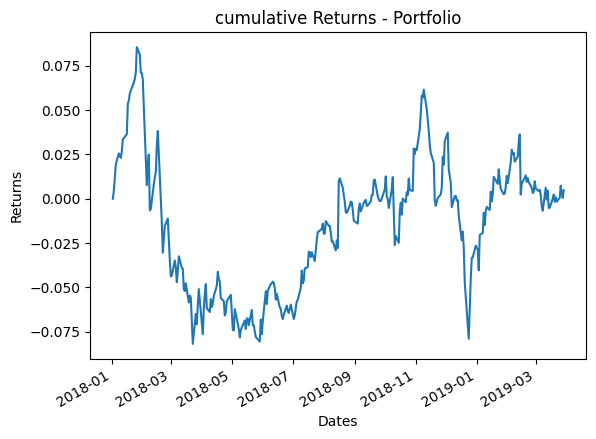

In [32]:
CumulativeReturns.plot()
_=plt.xlabel('Dates')
_=plt.ylabel('Returns')
_=plt.title('cumulative Returns - Portfolio')
plt.show()


### • Determine the running maximum

In [33]:
running_maximum=np.maximum.accumulate(CumulativeReturns)
running_maximum.tail()

Date
2019-03-25    0.085528
2019-03-26    0.085528
2019-03-27    0.085528
2019-03-28    0.085528
2019-03-29    0.085528
Name: Portfolio, dtype: float64

The running maximum is taking the maximum of the cumulative returns and accumulates it so that there is a constant return. This is because the drawdown formula divides the cumulative return of the portfolio into the running maximum. The np.maximum.accumulate accumulates all the elements.

### • Establish that the running maximum should not go below zero

In [34]:
running_maximum=running_maximum<1
running_maximum.tail()

Date
2019-03-25    True
2019-03-26    True
2019-03-27    True
2019-03-28    True
2019-03-29    True
Name: Portfolio, dtype: bool

### • Calculate the drawdown

In [35]:
portfolio_drawdown=(CumulativeReturns)/running_maximum - 1
portfolio_drawdown


Date
2018-01-02   -1.000000
2018-01-03   -0.995580
2018-01-04   -0.987866
2018-01-05   -0.980514
2018-01-08   -0.974411
                ...   
2019-03-25   -0.999428
2019-03-26   -0.992601
2019-03-27   -0.996863
2019-03-28   -0.999509
2019-03-29   -0.995188
Name: Portfolio, Length: 312, dtype: float64

### • Plot the drawdown (Fig. 2)

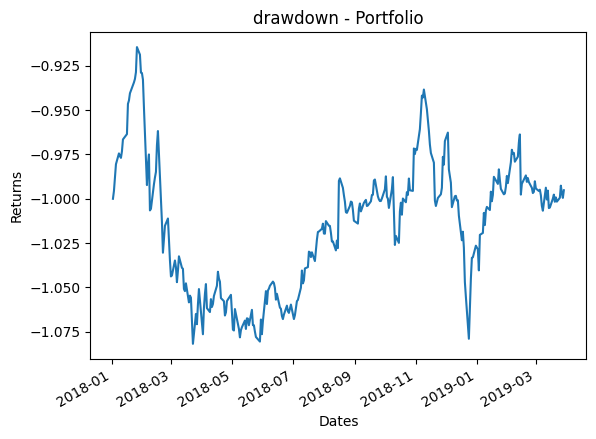

In [36]:
portfolio_drawdown.plot()

_=plt.xlabel('Dates')

_=plt.ylabel('Returns')

_=plt.title('drawdown - Portfolio')

plt.show()

As can be seen in the drawdown the returns are negative and it demonstrates that the worst loss is between the end of 2018 and February 2019. It is an interesting approach based on the drawdown to observe how the portfolio could behave to a VaR. In this case the worst loss is 1.4% being a very stable portfolio.